In [72]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [73]:
glob('../../data/11.seoul_crime_part3/*')     

['../../data/11.seoul_crime_part3/2015.csv',
 '../../data/11.seoul_crime_part3/crime_station.csv',
 '../../data/11.seoul_crime_part3/seoul_crime_result.csv',
 '../../data/11.seoul_crime_part3/2012.csv',
 '../../data/11.seoul_crime_part3/2014.csv',
 '../../data/11.seoul_crime_part3/2000.csv',
 '../../data/11.seoul_crime_part3/2008.csv',
 '../../data/11.seoul_crime_part3/2009.csv',
 '../../data/11.seoul_crime_part3/2019.csv',
 '../../data/11.seoul_crime_part3/2016.csv',
 '../../data/11.seoul_crime_part3/2003.csv',
 '../../data/11.seoul_crime_part3/2001.csv',
 '../../data/11.seoul_crime_part3/2013.csv',
 '../../data/11.seoul_crime_part3/2006.csv',
 '../../data/11.seoul_crime_part3/2005.csv',
 '../../data/11.seoul_crime_part3/2017.csv',
 '../../data/11.seoul_crime_part3/2010.csv',
 '../../data/11.seoul_crime_part3/2011.csv',
 '../../data/11.seoul_crime_part3/2007.csv',
 '../../data/11.seoul_crime_part3/2004.csv',
 '../../data/11.seoul_crime_part3/2018.csv',
 '../../data/11.seoul_crime_part

In [74]:
target_path = '../../data/11.seoul_crime_part3'
file_list = glob(target_path+'/20*.csv')
file_list

['../../data/11.seoul_crime_part3/2015.csv',
 '../../data/11.seoul_crime_part3/2012.csv',
 '../../data/11.seoul_crime_part3/2014.csv',
 '../../data/11.seoul_crime_part3/2000.csv',
 '../../data/11.seoul_crime_part3/2008.csv',
 '../../data/11.seoul_crime_part3/2009.csv',
 '../../data/11.seoul_crime_part3/2019.csv',
 '../../data/11.seoul_crime_part3/2016.csv',
 '../../data/11.seoul_crime_part3/2003.csv',
 '../../data/11.seoul_crime_part3/2001.csv',
 '../../data/11.seoul_crime_part3/2013.csv',
 '../../data/11.seoul_crime_part3/2006.csv',
 '../../data/11.seoul_crime_part3/2005.csv',
 '../../data/11.seoul_crime_part3/2017.csv',
 '../../data/11.seoul_crime_part3/2010.csv',
 '../../data/11.seoul_crime_part3/2011.csv',
 '../../data/11.seoul_crime_part3/2007.csv',
 '../../data/11.seoul_crime_part3/2004.csv',
 '../../data/11.seoul_crime_part3/2018.csv',
 '../../data/11.seoul_crime_part3/2002.csv']

In [75]:
#파일명 list로 저장된 것 확인
# usecols: 어떤 거 쓸지 정해주고
# list에서 -1 : 가장 맨 끝 단어 튀어나옴 [-1][-:4]->index 4전까지 가져와라
# apped 함수 : list의 값을 변수에 넣어줌

In [104]:
crime_station_t=[]

for each_file in file_list:
    crime_raw_data=pd.read_csv(each_file,usecols=[0,1,2,3],encoding='euc-kr')

    crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"],columns=["죄종", "발생검거"], aggfunc = [np.sum])

    crime_station.columns = ['강간검거','강간','강도검거','강도','살인검거','살인','절도검거','절도','폭력검거','폭력']

    crime_station['year'] = each_file.split('/')[-1][:4]

    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)

crime_station



/tmp/ipykernel_20597/4039503074.py:6: FutureWarning: The provided callable <function sum at 0x7ff310870940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(
/tmp/ipykernel_20597/4039503074.py:6: FutureWarning: The provided callable <function sum at 0x7ff310870940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(
/tmp/ipykernel_20597/4039503074.py:6: FutureWarning: The provided callable <function sum at 0x7ff310870940> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(
/tmp/ipykernel_2059

,구분,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,year
0,강남,58.0,80.0,207.0,252.0,6.0,3.0,2218.0,3744.0,3450.0,3787.0,2002
1,강동,54.0,60.0,63.0,66.0,6.0,6.0,1633.0,1666.0,2990.0,3255.0,2002
2,강북,65.0,69.0,89.0,79.0,7.0,7.0,1261.0,1847.0,2775.0,3035.0,2002
3,강서,74.0,80.0,71.0,71.0,10.0,8.0,1473.0,2504.0,3791.0,4134.0,2002
4,관악,40.0,106.0,43.0,66.0,8.0,8.0,1470.0,2625.0,2604.0,2915.0,2002
5,광진,62.0,90.0,71.0,88.0,15.0,12.0,2331.0,3607.0,3332.0,3749.0,2002
6,구로,55.0,82.0,52.0,75.0,7.0,4.0,1447.0,2417.0,2710.0,3158.0,2002
7,금천,61.0,64.0,54.0,73.0,22.0,16.0,1760.0,2061.0,3463.0,3864.0,2002
8,남대문,19.0,20.0,25.0,26.0,3.0,2.0,897.0,1146.0,1020.0,1090.0,2002
9,노원,31.0,36.0,29.0,25.0,6.0,7.0,928.0,1220.0,2051.0,2201.0,2002


In [ ]:
# concat : 합치기 연도별로 있는것을 한번에 합친것

In [82]:
crime_total = pd.concat(crime_station_t)
crime_total

,구분,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,year
0,강남,225.0,300.0,12.0,15.0,3.0,3.0,984.0,2411.0,2146.0,2465.0,2015
1,강동,123.0,156.0,8.0,6.0,3.0,4.0,789.0,2366.0,2248.0,2712.0,2015
2,강북,126.0,153.0,13.0,14.0,8.0,7.0,618.0,1434.0,2348.0,2649.0,2015
3,강서,191.0,262.0,13.0,13.0,8.0,7.0,1260.0,2096.0,2718.0,3207.0,2015
4,관악,221.0,320.0,14.0,12.0,8.0,9.0,827.0,2706.0,2642.0,3298.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
26,종로,30.0,33.0,21.0,20.0,1.0,0.0,1102.0,874.0,1471.0,1593.0,2002
27,종암,50.0,51.0,49.0,52.0,5.0,5.0,1745.0,1772.0,2091.0,2306.0,2002
28,중랑,72.0,72.0,57.0,68.0,8.0,8.0,2409.0,2627.0,3488.0,3992.0,2002
29,중부,24.0,59.0,18.0,21.0,2.0,1.0,810.0,1205.0,1341.0,1392.0,2002


In [79]:
crime_total_murder = crime_total.pivot(index='year', columns = '구분', values='살인')
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,3.0,12.0,9.0,6.0,8.0,2.0,10.0,10.0,3.0,3.0,...,3.0,5.0,6.0,5.0,2.0,4.0,8.0,13.0,1.0,3.0
2001,13.0,9.0,6.0,16.0,3.0,14.0,4.0,13.0,6.0,8.0,...,4.0,8.0,7.0,3.0,6.0,3.0,10.0,16.0,0.0,4.0
2002,3.0,6.0,7.0,8.0,8.0,12.0,4.0,16.0,2.0,7.0,...,7.0,6.0,3.0,2.0,3.0,0.0,5.0,8.0,1.0,4.0
2003,7.0,6.0,9.0,5.0,4.0,6.0,6.0,15.0,2.0,3.0,...,5.0,7.0,8.0,14.0,5.0,3.0,2.0,11.0,0.0,5.0
2004,8.0,7.0,15.0,8.0,0.0,10.0,13.0,16.0,1.0,5.0,...,6.0,6.0,5.0,8.0,5.0,1.0,7.0,7.0,2.0,7.0
2005,8.0,5.0,10.0,10.0,5.0,16.0,10.0,14.0,1.0,10.0,...,5.0,12.0,4.0,9.0,7.0,3.0,6.0,14.0,2.0,2.0
2006,5.0,4.0,5.0,16.0,5.0,7.0,16.0,5.0,2.0,6.0,...,4.0,5.0,12.0,9.0,3.0,7.0,6.0,11.0,4.0,5.0
2007,8.0,7.0,12.0,4.0,13.0,8.0,19.0,6.0,0.0,11.0,...,4.0,8.0,13.0,9.0,6.0,5.0,8.0,13.0,4.0,2.0
2008,10.0,8.0,7.0,18.0,10.0,3.0,22.0,3.0,1.0,3.0,...,3.0,11.0,19.0,7.0,7.0,5.0,5.0,7.0,4.0,3.0


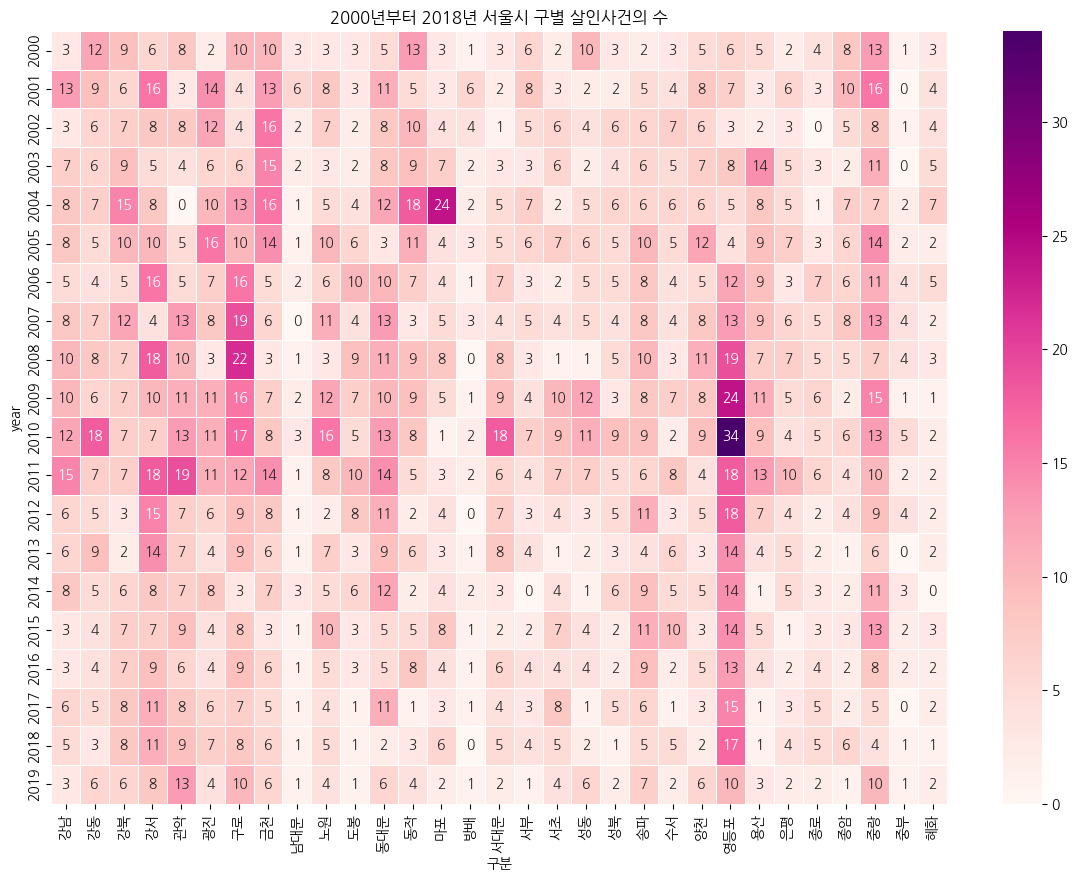

In [112]:
plt.figure(figsize = (13,10))
sns.heatmap(crime_total_murder,annot=True, linewidths=.5, cmap='RdPu')
plt.title('2000년부터 2018년 서울시 구별 살인사건의 수')
plt.autoscale()
plt.tight_layout(pad=5)
plt.show()

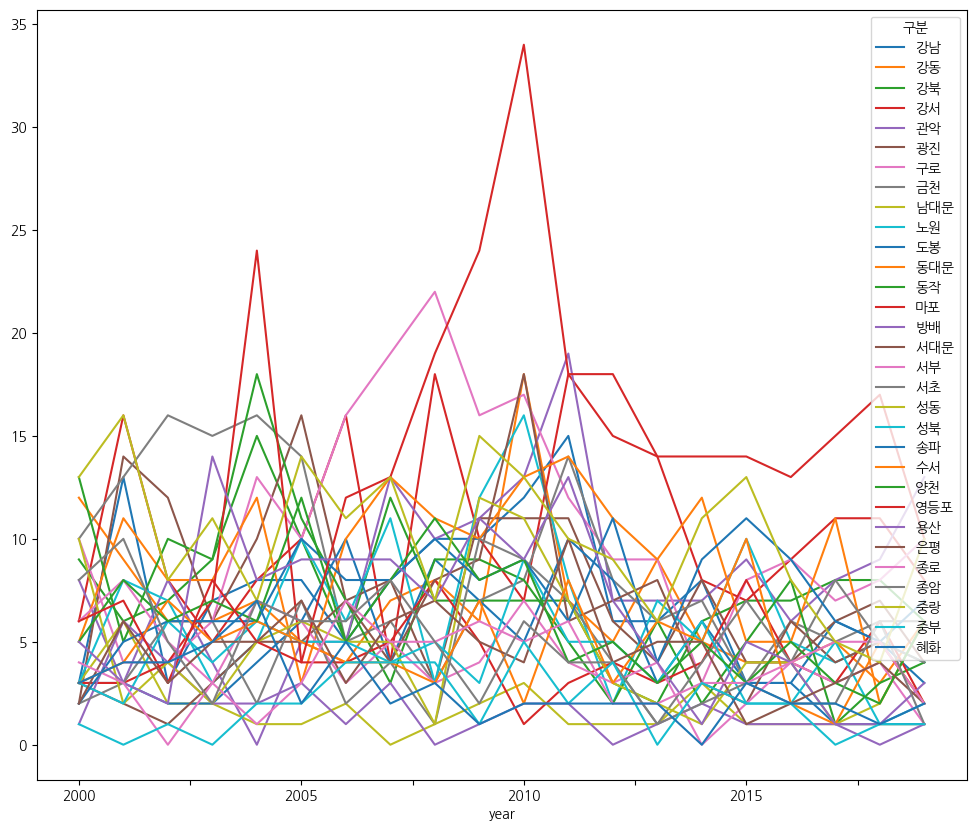

In [108]:
crime_total_murder.plot(figsize=(12,10)
                    

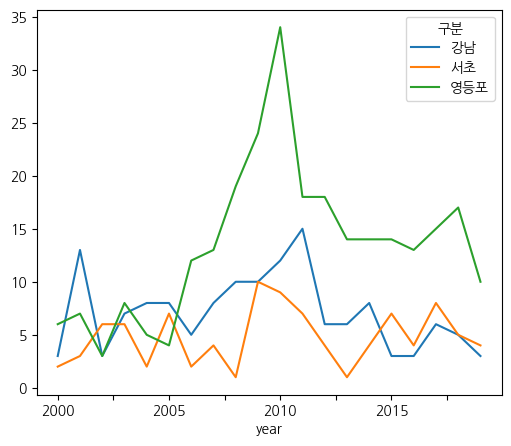

In [105]:
crime_total_murder[['강남','서초','영등포']].plot(figsize=(6,))
plt.show()

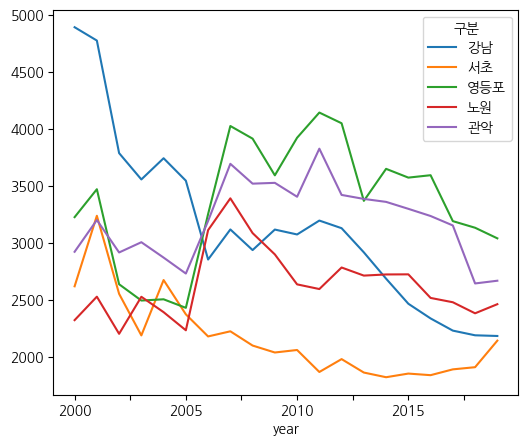

In [106]:
crime_total_violence = crime_total.pivot(index='year', columns = '구분', values='폭력')
crime_total_violence[['강남','서초','영등포','노원','관악']].plot(figsize=(6,5))
plt.show()

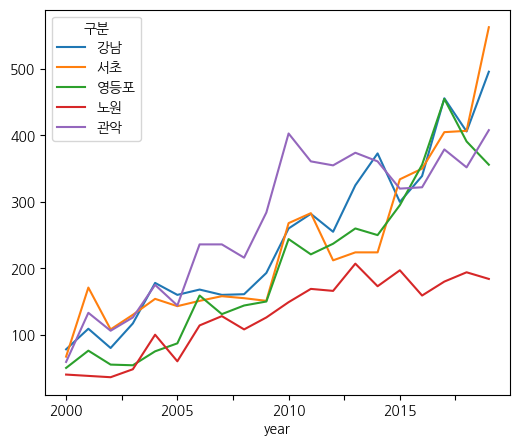

In [109]:
crime_total_sexual = crime_total.pivot(index='year', columns = '구분', values='강간')
crime_total_sexual[['강남','서초','영등포','노원','관악']].plot(figsize=(6,5))
plt.show()

<Axes: xlabel='구분', ylabel='year'>

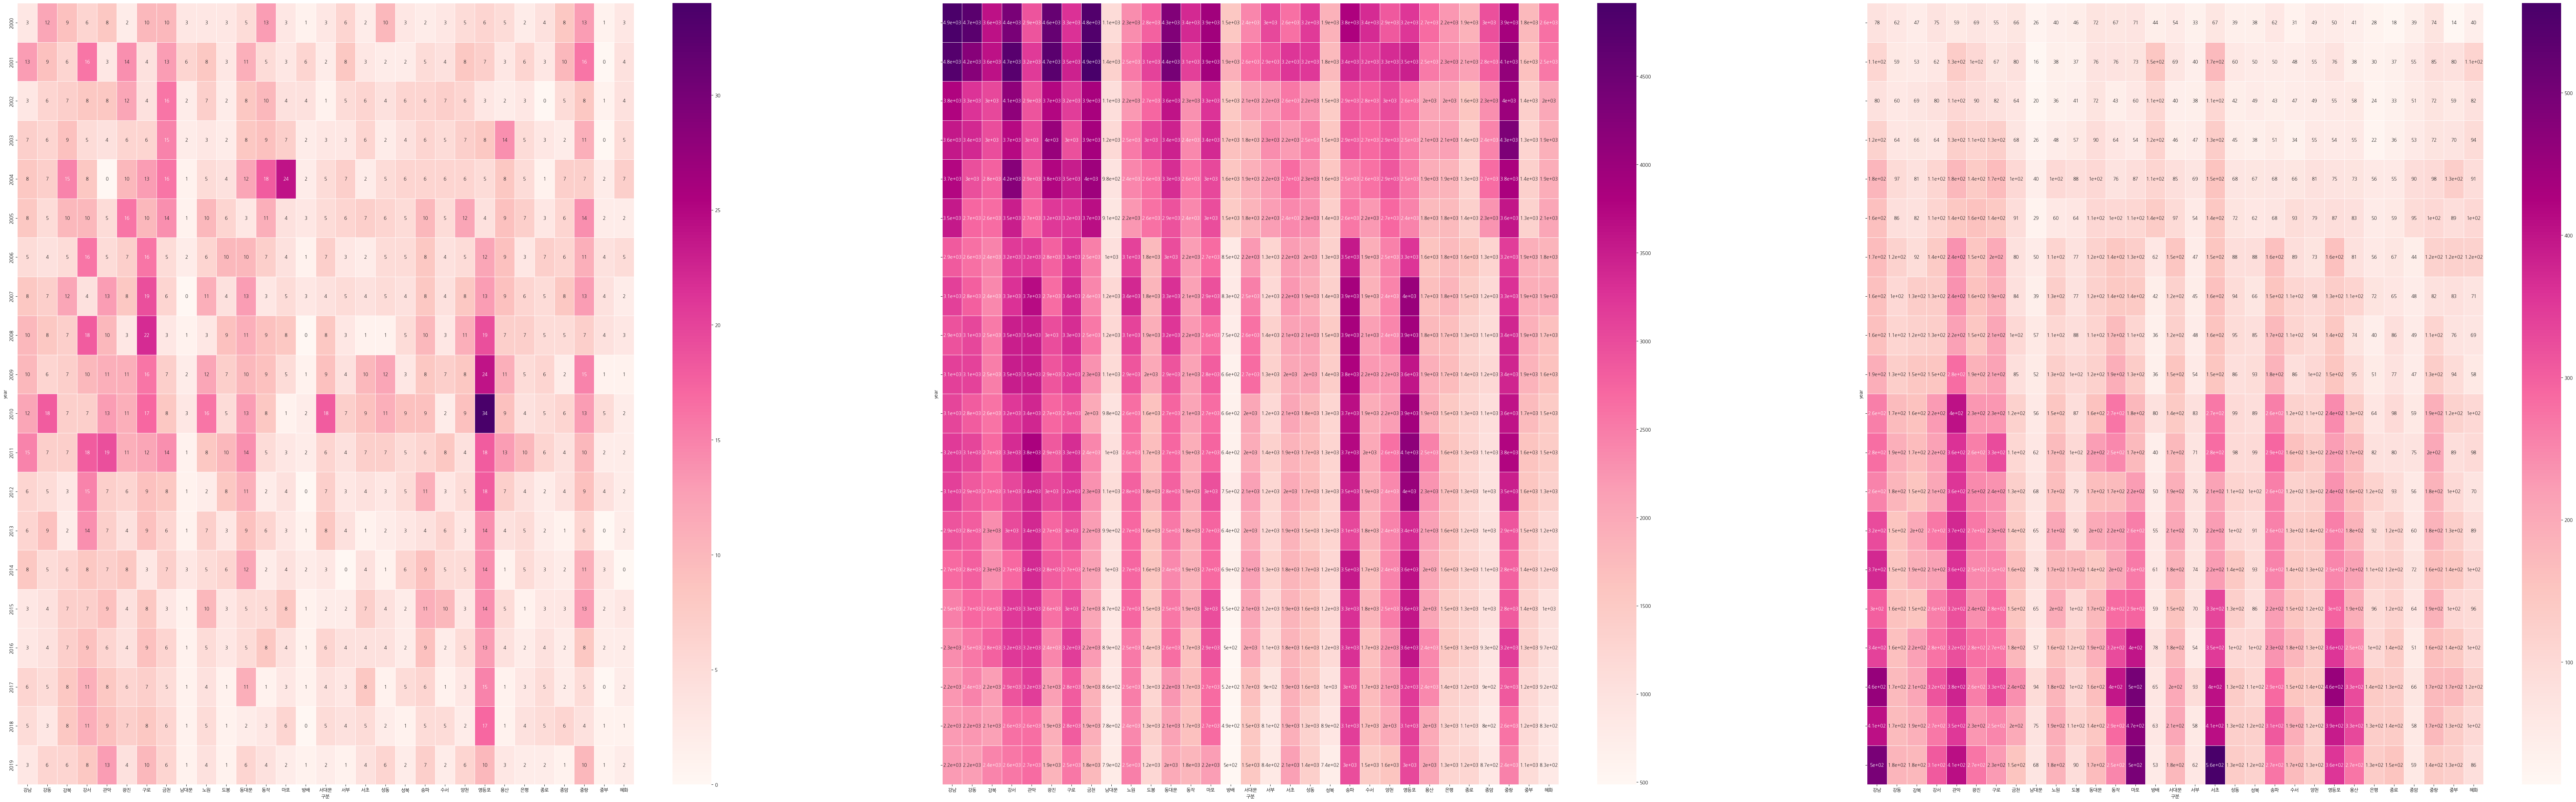

In [137]:
fig, ax=plt.subplots(1,3,figsize=(100,30), sharey=True)
sns.heatmap(crime_total_murder,annot=True, linewidths=.5, cmap='RdPu',ax=ax[0])
sns.heatmap(crime_total_violence,annot=True, linewidths=.5, cmap='RdPu',ax=ax[1])
sns.heatmap(crime_total_sexual,annot=True, linewidths=.5, cmap='RdPu',ax=ax[2])